In [1]:
# To fix, need to change age range from jr, open etc. to 19-23. The full dataset is janky with weights, so not everyone is under junior, but it is under 19-23.

In [1]:
import pandas as pd
import numpy as np

### PEEPOOO


In [33]:
df = pd.read_csv('./openpl mid 2023/openpldata_all.csv')

C:\Users\Eric\AppData\Local\Temp\ipykernel_4940\1454962144.py:1: DtypeWarning: Columns (33,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./openpl mid 2023/openpldata_all.csv')


In [34]:
df.columns.tolist()

['Name',
 'Sex',
 'Event',
 'Equipment',
 'Age',
 'AgeClass',
 'BirthYearClass',
 'Division',
 'BodyweightKg',
 'WeightClassKg',
 'Squat1Kg',
 'Squat2Kg',
 'Squat3Kg',
 'Squat4Kg',
 'Best3SquatKg',
 'Bench1Kg',
 'Bench2Kg',
 'Bench3Kg',
 'Bench4Kg',
 'Best3BenchKg',
 'Deadlift1Kg',
 'Deadlift2Kg',
 'Deadlift3Kg',
 'Deadlift4Kg',
 'Best3DeadliftKg',
 'TotalKg',
 'Place',
 'Dots',
 'Wilks',
 'Glossbrenner',
 'Goodlift',
 'Tested',
 'Country',
 'State',
 'Federation',
 'ParentFederation',
 'Date',
 'MeetCountry',
 'MeetState',
 'MeetTown',
 'MeetName']

In [39]:

# Create a copy of the original DataFrame
df_raw = df.copy()

# Filter the rows to keep only those where the "Equipment" column is equal to "Raw"
df_raw = df_raw[
    (df_raw["Tested"] == "Yes") 
    &
   (df_raw["Equipment"] == "Raw")  


]

df_raw.head()

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,Alona Vladi,F,SBD,Raw,33.0,24-34,24-39,O,58.30,60,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
1,Galina Solovyanova,F,SBD,Raw,43.0,40-44,40-49,M1,73.10,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
2,Daniil Voronin,M,SBD,Raw,15.5,16-17,14-18,T,67.40,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
3,Aleksey Krasov,M,SBD,Raw,35.0,35-39,24-39,O,66.65,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
4,Margarita Pleschenkova,M,SBD,Raw,26.5,24-34,24-39,O,72.45,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament


In [14]:
df_raw['BirthYearClass'].unique()

array([nan, '24-39', '50-59', '19-23', '40-49', '60-69', '14-18',
       '70-999'], dtype=object)

In [66]:
def sort_lifter_category(user_sex, user_age, user_weight):
    # Define the age classes and their corresponding titles
    age_classes = {
        (40, 49): 'Masters 1',
        (24, 39): 'Open',
        (50, 59): 'Masters 2',
        (60, 69): 'Masters 3',
        (14, 18): 'Sub-Junior',
        (19, 23): 'Junior',
        (70, 999): 'Masters 4'  # Use a high value to represent the last age class
    }
    BirthYearClass = {
        (40, 49): '40-49',
        (24, 39): '24-39',
        (50, 59): '50-59',
        (60, 69): '60-69',
        (14, 18): '14-18',
        (19, 23): '19-23',
        (70, 999): '70-999'  
    }

    # Define weight classes for Women and Men
    weight_classes = {
        'F': {
            48.01: '47',
            52.01: '52',
            57.01: '57',
            63.01: '63',
            69.01: '69',
            76.01: '76',
            84.01: '84',
            999: '84+'  # Use a high value to represent the last weight class
        },
        'M': {
            59.01: '59',
            66.01: '66',
            75.01: '74',
            83.01: '83',
            93.01: '93',
            105.01: '105',
            120.01: '120',
            999.01: '120+'  # Use a high value to represent the last weight class
        }
    }

    # Determine the age class based on user_age
    age_class = None
    for age_range, class_name in age_classes.items():
        if age_range[0] <= user_age <= age_range[1]:
            age_class = class_name
            break

    # Determine the BirthYearClass based on user_age
    age_class = None
    for age_range, class_name in age_classes.items():
        if age_range[0] <= user_age <= age_range[1]:
            age_class = class_name
            break

    # Determine the BirthYearClass based on user_age
    birth_class = None
    for age_range, class_name in BirthYearClass.items():
        if age_range[0] <= user_age <= age_range[1]:
            birth_class = class_name
            break

    # Determine the weight class based on user_weight
    weight_class = None
    for weight, class_name in weight_classes[user_sex].items():
        if user_weight < weight:
            weight_class = class_name
            break

    return age_class, weight_class, birth_class

# Take user input
user_sex = input("Enter Sex (M or F): ").upper()
user_age = float(input("Enter Age: "))      # Change int() to float()
user_weight = float(input("Enter Weight: "))  # Change int() to float()

# Get sorted category based on user input
age_class, weight_class, birth_class = sort_lifter_category(user_sex, user_age, user_weight)

# Create a dictionary to store the information
user_info = {
    'Sex': user_sex,
    'Age': user_age,
    'Weight': user_weight,
    'Division': age_class,
    'Weight Class': weight_class,
    'Birth Year Class': birth_class
}

# Output the results
print("User Information:")
for key, value in user_info.items():
    print(f"{key}: {value}")


Enter Sex (M or F): F
Enter Age: 20
Enter Weight: 48
User Information:
Sex: F
Age: 20.0
Weight: 48.0
Division: Junior
Weight Class: 47
Birth Year Class: 19-23


In [46]:


# Assuming df_raw is your DataFrame

# Filter rows where WeightClassKg is "52", Sex is "F", and Division is "Junior"
df_sorted = df_raw[(df_raw['WeightClassKg'] == "52") & (df_raw['Sex'] == "F") & (df_raw['BirthYearClass'] == '19-23')]

# Sort the DataFrame by WeightClassKg and Sex
df_sorted = df_sorted.sort_values(by=['WeightClassKg', 'Sex'])



# Display the sorted DataFrame
df_sorted


,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
5266,Rae-Leigh Lyons,F,SBD,Raw,20.5,20-23,19-23,Juniors,51.50,52,...,Yes,Australia,NaN,OceaniaPF,IPF,2012-12-07,Australia,NSW,Syndey,Oceania Powerlifting and Bench Press Champions...
5366,Rae-Leigh Lyons,F,B,Raw,20.5,20-23,19-23,Juniors,51.30,52,...,Yes,Australia,NaN,OceaniaPF,IPF,2012-12-07,Australia,NSW,Syndey,Oceania Powerlifting and Bench Press Champions...
5819,Sarah Simpson,F,SBD,Raw,22.5,20-23,19-23,Juniors,51.80,52,...,Yes,New Zealand,NaN,OceaniaPF,IPF,2014-12-08,Australia,VIC,Melbourne,Asia & Oceania Championships
5820,Olivia McConnell,F,SBD,Raw,22.5,20-23,19-23,Juniors,51.55,52,...,Yes,Australia,NaN,OceaniaPF,IPF,2014-12-08,Australia,VIC,Melbourne,Asia & Oceania Championships
6530,Dobi Mea,F,SBD,Raw,22.5,20-23,19-23,Open,50.83,52,...,Yes,Papua New Guinea,NaN,OceaniaPF,IPF,2015-10-09,Papua New Guinea,NaN,Port Moresby,Pacific Games
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2950708,Izabela Góralska,F,SBD,Raw,21.5,20-23,19-23,Juniors,50.95,52,...,Yes,Poland,NaN,IPF,IPF,2022-08-31,Turkey,NaN,Istanbul,World Junior Classic Powerlifting Championships
2950709,Fiona Chen,F,SBD,Raw,22.5,20-23,19-23,Juniors,50.90,52,...,Yes,Canada,NaN,IPF,IPF,2022-08-31,Turkey,NaN,Istanbul,World Junior Classic Powerlifting Championships
2950710,Yareldy Pech,F,SBD,Raw,22.5,20-23,19-23,Juniors,51.55,52,...,Yes,Mexico,NaN,IPF,IPF,2022-08-31,Turkey,NaN,Istanbul,World Junior Classic Powerlifting Championships
2950711,Emily Manire,F,SBD,Raw,20.5,20-23,19-23,Juniors,51.90,52,...,Yes,USA,NaN,IPF,IPF,2022-08-31,Turkey,NaN,Istanbul,World Junior Classic Powerlifting Championships


In [54]:
# The function to determine age and weight classes based on user input
def sort_lifter_category(user_sex, user_age, user_weight):
    # Define the age classes and their corresponding titles
    age_classes = {
        (40, 49): 'Masters 1',
        (24, 39): 'Open',
        (50, 59): 'Masters 2',
        (60, 69): 'Masters 3',
        (14, 18): 'Sub-Junior',
        (19, 23): 'Junior',
        (70, 999): 'Masters 4'  # Use a high value to represent the last age class
    }
    BirthYearClass = {
        (40, 49): '40-49',
        (24, 39): '24-39',
        (50, 59): '50-59',
        (60, 69): '60-69',
        (14, 18): '14-18',
        (19, 23): '19-23',
        (70, 999): '70-999'  
    }

    # Determine the age class based on user_age
    age_class = None
    for age_range, class_name in age_classes.items():
        if age_range[0] <= user_age <= age_range[1]:
            age_class = class_name
            break

    # Determine the weight class based on user_weight
    weight_class = None
    for weight, class_name in weight_classes[user_sex].items():
        if user_weight < weight:
            weight_class = class_name
            break

    # Determine the BirthYearClass based on user_age
    birth_year_class = None
    for age_range, class_name in BirthYearClass.items():
        if age_range[0] <= user_age <= age_range[1]:
            birth_year_class = class_name
            break

    return age_class, weight_class, birth_year_class

# Take user input
user_sex = input("Enter Sex (M or F): ").upper()
user_age = int(input("Enter Age: "))
user_weight = int(input("Enter Weight: "))

# Get sorted category based on user input
age_class, weight_class, birth_year_class = sort_lifter_category(user_sex, user_age, user_weight)

df_sorted = df_raw[(df_raw['WeightClassKg'] == user_info['Weight Class']) & (df_raw['Sex'] == user_info['Sex']) & (df_raw['BirthYearClass'] == birth_year_class)]

# Sort the DataFrame by WeightClassKg and Sex
df_sorted = df_sorted.sort_values(by=['WeightClassKg', 'Sex'])

# Display the sorted DataFrame
print(df_sorted)


Enter Sex (M or F): F
Enter Age: 20
Enter Weight: 52
                     Name Sex Event Equipment   Age AgeClass BirthYearClass  \
5266      Rae-Leigh Lyons   F   SBD       Raw  20.5    20-23          19-23   
5366      Rae-Leigh Lyons   F     B       Raw  20.5    20-23          19-23   
5819        Sarah Simpson   F   SBD       Raw  22.5    20-23          19-23   
5820     Olivia McConnell   F   SBD       Raw  22.5    20-23          19-23   
6530             Dobi Mea   F   SBD       Raw  22.5    20-23          19-23   
...                   ...  ..   ...       ...   ...      ...            ...   
2950708  Izabela Góralska   F   SBD       Raw  21.5    20-23          19-23   
2950709        Fiona Chen   F   SBD       Raw  22.5    20-23          19-23   
2950710      Yareldy Pech   F   SBD       Raw  22.5    20-23          19-23   
2950711      Emily Manire   F   SBD       Raw  20.5    20-23          19-23   
2950712        Arisa Maki   F   SBD       Raw  22.5    20-23          19-23   

In [59]:
import pandas as pd

# Assuming you have already loaded your DataFrame `df_sorted`

# Take user input
user_squat = int(input("Enter Squat: "))

# Calculate the number of rows where Best3SquatKg is lower than user_squat
lower_count = df_sorted[df_sorted['Best3SquatKg'] < user_squat].shape[0]

# Calculate the total number of rows in the DataFrame
total_count = df_sorted.shape[0]

# Calculate the percentage
percentage_higher = (lower_count / total_count) * 100

print(f"The user_squat is higher than {percentage_higher:.2f}% of the values in Best3SquatKg column.")


Enter Squat: 100000
The user_squat is higher than 74.52% of the values in Best3SquatKg column.


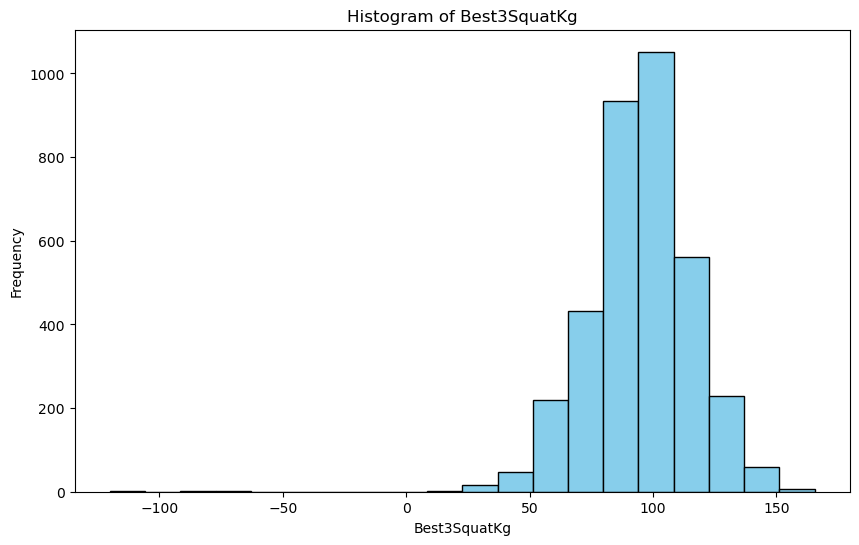

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded your DataFrame `df_sorted`

# Create the histogram
plt.figure(figsize=(10, 6))  # Set the size of the figure (width, height)
plt.hist(df_sorted['Best3SquatKg'], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Best3SquatKg')  # Set the x-axis label
plt.ylabel('Frequency')     # Set the y-axis label
plt.title('Histogram of Best3SquatKg')  # Set the title of the histogram

# Show the histogram
plt.show()


In [63]:
df_sorted['Best3SquatKg'].max()

165.5

In [64]:


# Assuming df_raw is your DataFrame

# Filter rows where WeightClassKg is "52", Sex is "F", and Division is "Junior"
df_cum = df_raw[(df_raw['WeightClassKg'] == "52") & (df_raw['Sex'] == "F") & (df_raw['BirthYearClass'] == '19-23')]




# Display the sorted DataFrame
df_cum

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
5266,Rae-Leigh Lyons,F,SBD,Raw,20.5,20-23,19-23,Juniors,51.50,52,...,Yes,Australia,NaN,OceaniaPF,IPF,2012-12-07,Australia,NSW,Syndey,Oceania Powerlifting and Bench Press Champions...
5366,Rae-Leigh Lyons,F,B,Raw,20.5,20-23,19-23,Juniors,51.30,52,...,Yes,Australia,NaN,OceaniaPF,IPF,2012-12-07,Australia,NSW,Syndey,Oceania Powerlifting and Bench Press Champions...
5819,Sarah Simpson,F,SBD,Raw,22.5,20-23,19-23,Juniors,51.80,52,...,Yes,New Zealand,NaN,OceaniaPF,IPF,2014-12-08,Australia,VIC,Melbourne,Asia & Oceania Championships
5820,Olivia McConnell,F,SBD,Raw,22.5,20-23,19-23,Juniors,51.55,52,...,Yes,Australia,NaN,OceaniaPF,IPF,2014-12-08,Australia,VIC,Melbourne,Asia & Oceania Championships
6530,Dobi Mea,F,SBD,Raw,22.5,20-23,19-23,Open,50.83,52,...,Yes,Papua New Guinea,NaN,OceaniaPF,IPF,2015-10-09,Papua New Guinea,NaN,Port Moresby,Pacific Games
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2950708,Izabela Góralska,F,SBD,Raw,21.5,20-23,19-23,Juniors,50.95,52,...,Yes,Poland,NaN,IPF,IPF,2022-08-31,Turkey,NaN,Istanbul,World Junior Classic Powerlifting Championships
2950709,Fiona Chen,F,SBD,Raw,22.5,20-23,19-23,Juniors,50.90,52,...,Yes,Canada,NaN,IPF,IPF,2022-08-31,Turkey,NaN,Istanbul,World Junior Classic Powerlifting Championships
2950710,Yareldy Pech,F,SBD,Raw,22.5,20-23,19-23,Juniors,51.55,52,...,Yes,Mexico,NaN,IPF,IPF,2022-08-31,Turkey,NaN,Istanbul,World Junior Classic Powerlifting Championships
2950711,Emily Manire,F,SBD,Raw,20.5,20-23,19-23,Juniors,51.90,52,...,Yes,USA,NaN,IPF,IPF,2022-08-31,Turkey,NaN,Istanbul,World Junior Classic Powerlifting Championships
